In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
import io

In [3]:
# Set up working Directory
%cd "C:\Users\zaida\OneDrive\Desktop\Machine Learning\ML DATASET"

C:\Users\zaida\OneDrive\Desktop\Machine Learning\ML DATASET


In [4]:
df=pd.read_csv("Car details v3.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [7]:
# Dependent Variable is -- Selling price
# Research objective -- Build a model that can predict selling price of the car

In [8]:
df.mileage

0        23.4 kmpl
1       21.14 kmpl
2        17.7 kmpl
3        23.0 kmpl
4        16.1 kmpl
           ...    
8123     18.5 kmpl
8124     16.8 kmpl
8125     19.3 kmpl
8126    23.57 kmpl
8127    23.57 kmpl
Name: mileage, Length: 8128, dtype: object

In [9]:
df.engine

0       1248 CC
1       1498 CC
2       1497 CC
3       1396 CC
4       1298 CC
         ...   
8123    1197 CC
8124    1493 CC
8125    1248 CC
8126    1396 CC
8127    1396 CC
Name: engine, Length: 8128, dtype: object

In [10]:
df.max_power

0           74 bhp
1       103.52 bhp
2           78 bhp
3           90 bhp
4         88.2 bhp
           ...    
8123     82.85 bhp
8124       110 bhp
8125      73.9 bhp
8126        70 bhp
8127        70 bhp
Name: max_power, Length: 8128, dtype: object

In [11]:
df.torque

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2           12.7@ 2,700(kgm@ rpm)
3        22.4 kgm at 1750-2750rpm
4           11.5@ 4,500(kgm@ rpm)
                  ...            
8123             113.7Nm@ 4000rpm
8124    24@ 1,900-2,750(kgm@ rpm)
8125               190Nm@ 2000rpm
8126          140Nm@ 1800-3000rpm
8127          140Nm@ 1800-3000rpm
Name: torque, Length: 8128, dtype: object

In [12]:
#  pandas replace() - first pattern to be replaced and second replacement
df.mileage=df.mileage.str.replace("kmpl","")

In [13]:
df.mileage=df.mileage.str.replace("km/kg","")


In [14]:
df.mileage=df.mileage.astype(float)

In [15]:
df.mileage

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8123    18.50
8124    16.80
8125    19.30
8126    23.57
8127    23.57
Name: mileage, Length: 8128, dtype: float64

In [16]:
df.engine=df.engine.str.replace("CC","")

In [17]:
df.engine=df.engine.astype(int,errors="ignore")

In [18]:
df.engine=pd.to_numeric(df.engine,errors="coerce")
# pd.to_numeric() - brute force conversion 

In [19]:
df.engine

0       1248.0
1       1498.0
2       1497.0
3       1396.0
4       1298.0
         ...  
8123    1197.0
8124    1493.0
8125    1248.0
8126    1396.0
8127    1396.0
Name: engine, Length: 8128, dtype: float64

In [20]:
df.max_power=df.max_power.str.replace("bhp","")

In [21]:
df.max_power=df.max_power.str.replace(' ',"")

In [22]:
df.max_power=df.max_power.str.replace('',"")

In [23]:
df.max_power=pd.to_numeric(df.max_power,errors="coerce")
# pd.to_numeric() - brute force conversion 

In [24]:
df.max_power

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power, Length: 8128, dtype: float64

In [25]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object

In [26]:
# Extracting RPM from Torque

In [27]:
df["torq"]=df.torque.str.extract("(\d+(rpm))")[0]

In [28]:
df.torq=df.torq.str.replace("rpm","")

In [29]:
df.torq=pd.to_numeric(df.torq,errors="coerce")

In [30]:
df.torq

0       2000.0
1       2500.0
2          NaN
3       2750.0
4          NaN
         ...  
8123    4000.0
8124       NaN
8125    2000.0
8126    3000.0
8127    3000.0
Name: torq, Length: 8128, dtype: float64

In [31]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torq
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,2500.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,NaN
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,2750.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,NaN


In [32]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'torq'],
      dtype='object')

In [33]:
df[['mileage', 'engine', 'max_power', 'torque','seats', 'torq']].describe()

,mileage,engine,max_power,seats,torq
count,7907.000000,7907.000000,7912.000000,7907.000000,7332.000000
mean,19.418783,1458.625016,91.517919,5.416719,3072.693126
std,4.037145,503.916303,35.822499,0.959588,919.097085
min,0.000000,624.000000,0.000000,2.000000,500.000000
25%,16.780000,1197.000000,68.050000,5.000000,2250.000000
50%,19.300000,1248.000000,82.000000,5.000000,3000.000000
75%,22.320000,1582.000000,102.000000,5.000000,4000.000000
max,42.000000,3604.000000,400.000000,14.000000,5300.000000


In [34]:
# Outliars

<Axes: >

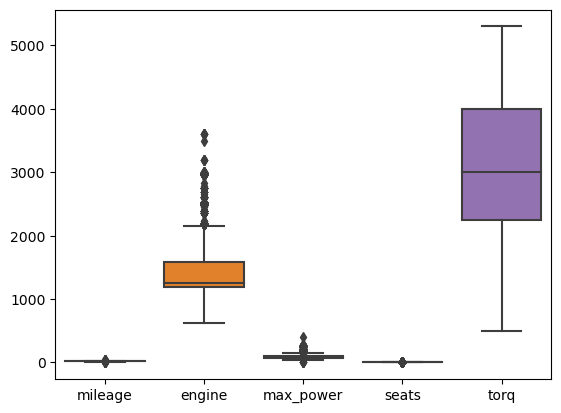

In [35]:
sns.boxplot(df[['mileage', 'engine', 'max_power','seats', 'torq']])

In [36]:
df[['mileage', 'engine', 'max_power','seats', 'torq']].isna().sum()

mileage      221
engine       221
max_power    216
seats        221
torq         796
dtype: int64

In [37]:
# Median Imputation of Missing value

In [38]:
for i in ['mileage', 'engine', 'max_power','seats', 'torq']:
    df[i]=df[i].fillna(df[i].median())

In [39]:
df.drop("torque",axis=1,inplace=True)

In [40]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
torq             0
dtype: int64

In [41]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torq
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,2500.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,3000.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,2750.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,3000.0


In [42]:
df.year.unique().max()

2020

In [43]:
# Create new variable "Age" based on purchase year as of year 2022
df["Age"]=2022-df.year

In [44]:
df["Age"].unique()

array([ 8, 16, 12, 15,  5, 21, 11,  9, 17, 13,  6, 10, 20,  7,  4, 19,  3,
       14,  2, 23, 22, 39, 18, 26, 28, 27, 24, 25, 31], dtype=int64)

In [45]:
df.Age.describe()

count    8128.000000
mean        8.195989
std         4.044249
min         2.000000
25%         5.000000
50%         7.000000
75%        11.000000
max        39.000000
Name: Age, dtype: float64

In [46]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'torq', 'Age'],
      dtype='object')

In [47]:
df["Companyname"]=df.name.str.split().str[0]

In [48]:
df["Companyname"]

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8123    Hyundai
8124    Hyundai
8125     Maruti
8126       Tata
8127       Tata
Name: Companyname, Length: 8128, dtype: object

In [49]:
df.drop(["name","year"],axis=1,inplace=True)

In [50]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torq,Age,Companyname
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,2000.0,8,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,2500.0,8,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,3000.0,16,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,2750.0,12,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,3000.0,15,Maruti


In [51]:
# Data Visualization
# Frequency counts and pie Diagram with percentage for variable fuel,seller_type,owner
# Then Cross Tabulation and Stacked Bar plot for variable fuel&seller_type , owner & fuel , companyname & fuel 
# Histogram, boxplot and Density Curve - Selling_price , km_driven , mileage 

<Axes: ylabel='count'>

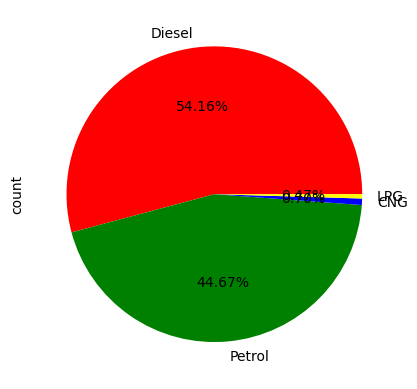

In [52]:
df.fuel.value_counts().plot(kind="pie",autopct="%.2f%%",colors=["red","green","blue","yellow"])

<Axes: ylabel='count'>

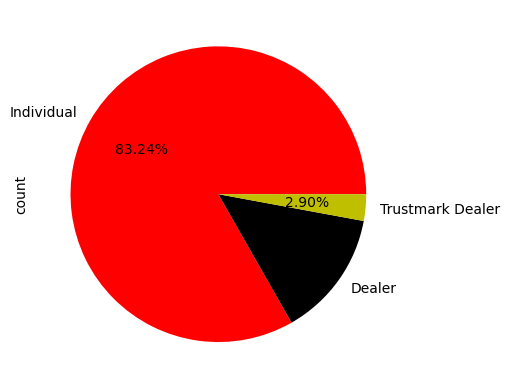

In [53]:
df.seller_type.value_counts().plot(kind="pie",autopct="%.2f%%",colors=["r","k","y"])

<Axes: ylabel='count'>

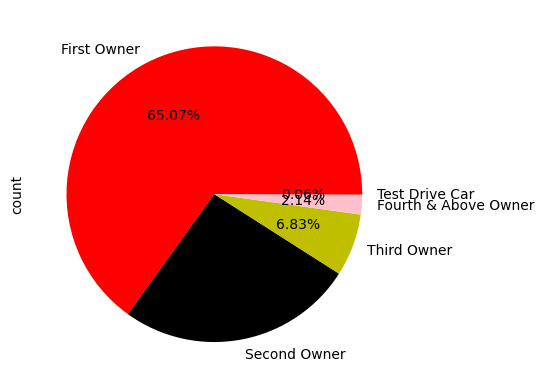

In [54]:
df.owner.value_counts().plot(kind="pie",autopct="%.2f%%",colors=["r","k","y","pink"])

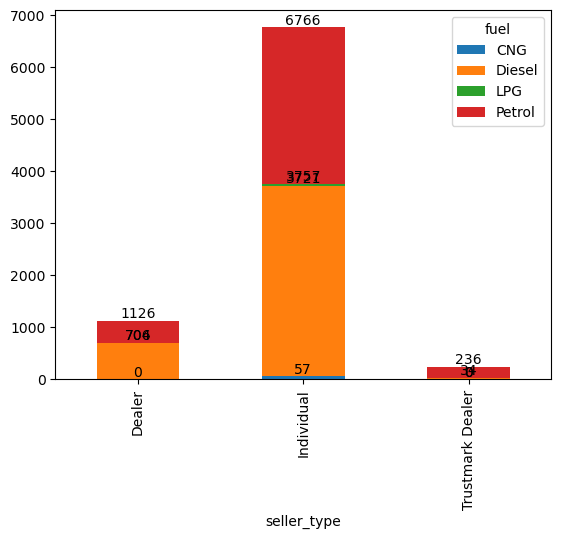

In [55]:
ax=pd.crosstab(df.seller_type,df.fuel).plot(kind="bar",stacked=True)
for i in ax.containers:
    ax.bar_label(i)

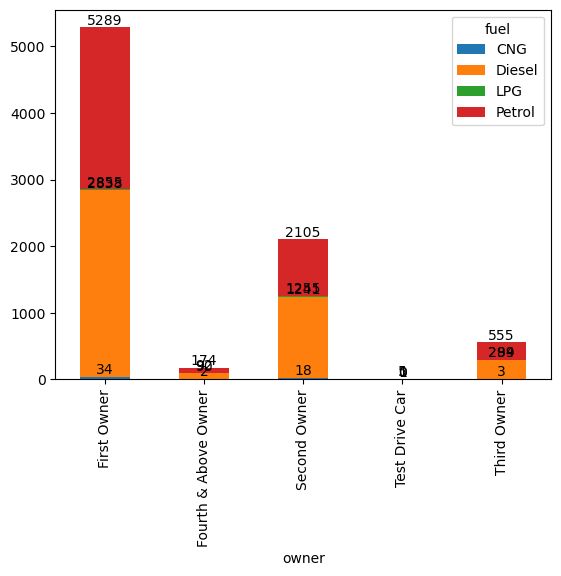

In [56]:
ax=pd.crosstab(df.owner,df.fuel).plot(kind="bar",stacked=True)
for i in ax.containers:
    ax.bar_label(i)

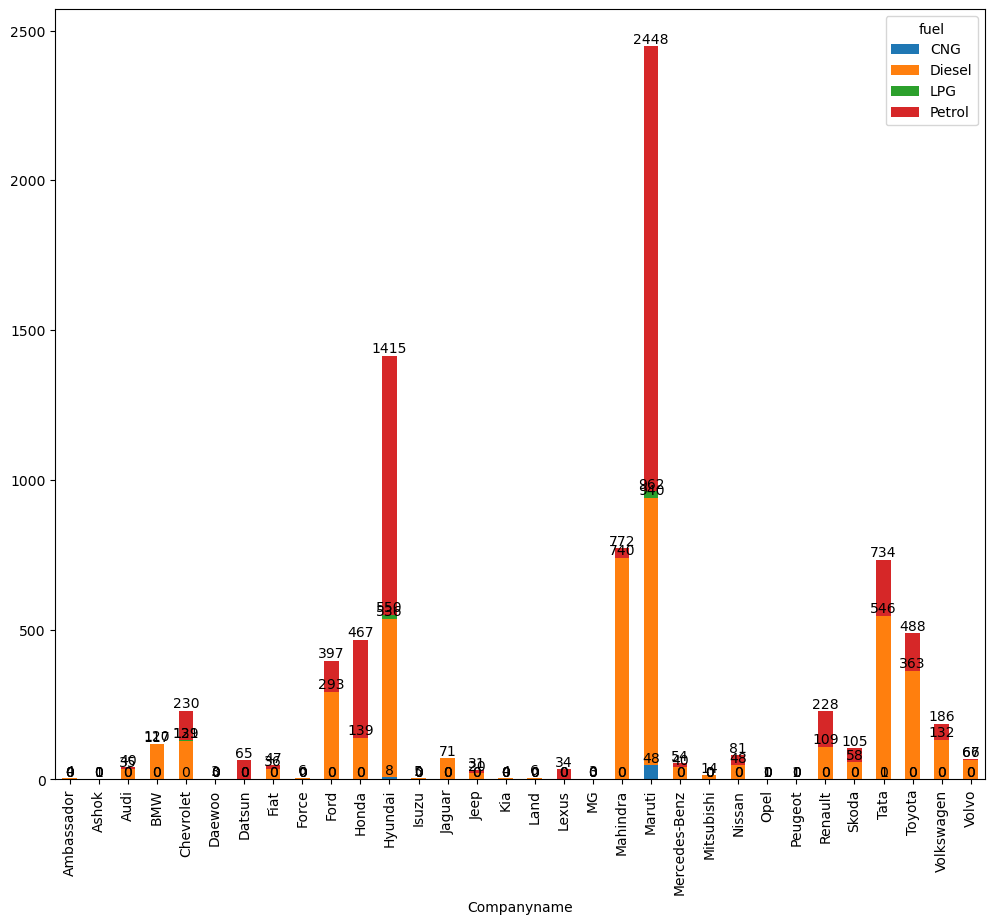

In [57]:
ax=pd.crosstab(df.Companyname,df.fuel).plot(kind="bar",stacked=True,figsize=(12,10))
for i in ax.containers:
    ax.bar_label(i)

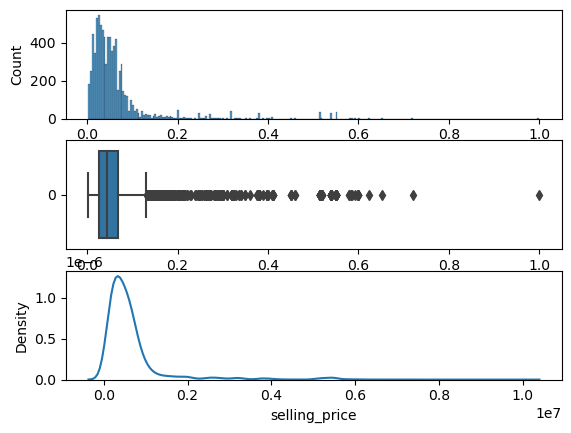

In [58]:
fig,ax=plt.subplots(3,1)
sns.histplot(df.selling_price,ax=ax[0])
sns.boxplot(df.selling_price,ax=ax[1],orient="h")
sns.kdeplot(df.selling_price,ax=ax[2])
plt.show()

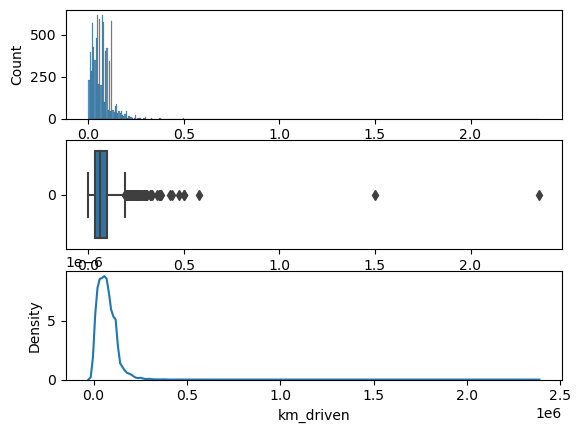

In [59]:
fig,ax=plt.subplots(3,1)
sns.histplot(df.km_driven,ax=ax[0])
sns.boxplot(df.km_driven,ax=ax[1],orient="h")
sns.kdeplot(df.km_driven,ax=ax[2])
plt.show()

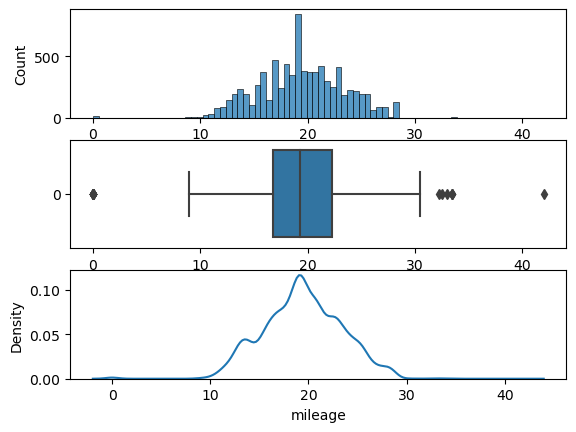

In [60]:
fig,ax=plt.subplots(3,1)
sns.histplot(df.mileage,ax=ax[0])
sns.boxplot(df.mileage,ax=ax[1],orient="h")
sns.kdeplot(df.mileage,ax=ax[2])
plt.show()

In [61]:
# HYPOTHESIS 

In [62]:
# Test Null Average selling_price of different transmission is equal
np.round(df.selling_price.groupby(df.transmission).mean(),2)
# Since exactly 2 levels/groups/classes - 2 Sample Independent T Test


transmission
Automatic    1870827.60
Manual        455425.86
Name: selling_price, dtype: float64

In [63]:
#Variance
np.round(df.selling_price.groupby(df.transmission).var(),2)

transmission
Automatic    2.691349e+12
Manual       8.872370e+10
Name: selling_price, dtype: float64

In [64]:
# Split Data into auto and manual
auto=df[df.transmission=="Automatic"]
manual=df[df.transmission=="Manual"]

In [65]:
from scipy.stats import ttest_ind

In [66]:
ttest_ind(auto.selling_price,manual.selling_price,equal_var=False)
# Since pvalue=8.531946079710315e-129 is less than 0.05, Reject Null
# Difference in Means is Statistically Significant

TtestResult(statistic=27.888813193478946, pvalue=8.531946079710315e-129, df=1059.2814874514092)

In [67]:
# Test Null Average km_driven for auto and manual cars equal
# groupby() - mean & var, Frame Null & Alt, Conduct test & interpret

In [68]:
np.round(df.km_driven.groupby(df.transmission).mean())

transmission
Automatic    40276.0
Manual       74202.0
Name: km_driven, dtype: float64

In [69]:
np.round(df.km_driven.groupby(df.transmission).var())

transmission
Automatic    1.250228e+09
Manual       3.338416e+09
Name: km_driven, dtype: float64

In [70]:
ttest_ind(auto.km_driven,manual.km_driven,equal_var=False)
# Since pvalue=2.851791533885484e-131 is less than 0.05, Reject Null

TtestResult(statistic=-26.31311123939943, pvalue=2.851791533885484e-131, df=1998.1925323759576)

In [71]:
# Test Null Average mileage of auto and manual cars equal

In [72]:
df.mileage.groupby(df.transmission).mean()

transmission
Automatic    17.579638
Manual       19.687906
Name: mileage, dtype: float64

In [73]:
df.mileage.groupby(df.transmission).var()

transmission
Automatic    15.773254
Manual       15.295890
Name: mileage, dtype: float64

In [74]:
# Frame Null and Alternate Hypothesis
# Null - There is no Significant difference in Average mileage of auto & 
# Alt - There is Significant difference in Average mileage of auto & manu

In [75]:
ttest_ind(auto.mileage,manual.mileage,equal_var=False)
# Since pvalue=1.924423779471943e-53 is less than 0.05, Reject Null

TtestResult(statistic=-16.08325308774936, pvalue=1.924423779471943e-53, df=1368.3244399399287)

In [76]:
# Test Null Average selling_price for different fuel is equal
df.selling_price.groupby(df.fuel).mean()
# More than 2 levels/groups/classes - Anova Single Factor


fuel
CNG       301017.491228
Diesel    791452.921627
LPG       200421.052632
Petrol    462441.061691
Name: selling_price, dtype: float64

In [77]:
# Frame Null & Alternate
# Split Data
cng=df[df.fuel=="CNG"]
diesel=df[df.fuel=="Diesel"]
lpg=df[df.fuel=="LPG"]
petrol=df[df.fuel=="Petrol"]

In [78]:
from scipy.stats import f_oneway

In [79]:
f_oneway(cng.selling_price,diesel.selling_price,lpg.selling_price,petrol.selling_price)
# Since pvalue=7.768067697277526e-78 is less than 0.05, Reject Null

F_onewayResult(statistic=122.88062883888716, pvalue=7.768067697277526e-78)

In [80]:
# Test Null Avearge mileage of different fuel cars equal
df.mileage.groupby(df.fuel).mean()


fuel
CNG       23.824211
Diesel    19.634607
LPG       18.634211
Petrol    19.088956
Name: mileage, dtype: float64

In [81]:
f_oneway(cng.mileage,diesel.mileage,lpg.mileage,petrol.mileage)
# Since pvalue=1.218592729218157e-23 is less than 0.05, Reject Null

F_onewayResult(statistic=36.842275392000154, pvalue=1.218592729218157e-23)

In [82]:
# Test Null No Assosiation between fuel and transmission

In [83]:
pd.crosstab(df.transmission,df.fuel)

fuel,CNG,Diesel,LPG,Petrol
transmission,,,,
Automatic,0,534,0,516
Manual,57,3868,38,3115


In [84]:
# Null - There is no assosiation between both variable 
# Alt - There is assosiation

In [85]:
from scipy.stats import chi2_contingency

In [86]:
chi2_contingency(pd.crosstab(df.transmission,df.fuel))
# Since P=6.801498516561924e-05 value is  Less than 0.05 reject null

Chi2ContingencyResult(statistic=21.912764347384904, pvalue=6.801498516561924e-05, dof=3, expected_freq=array([[   7.36343504,  568.66387795,    4.90895669,  469.06373031],
       [  49.63656496, 3833.33612205,   33.09104331, 3161.93626969]]))

In [87]:
# Test null no assoisiation between fuel and seller_type

In [88]:
pd.crosstab(df.fuel,df.seller_type)

seller_type,Dealer,Individual,Trustmark Dealer
fuel,,,
CNG,0,57,0
Diesel,704,3664,34
LPG,2,36,0
Petrol,420,3009,202


In [89]:
chi2_contingency(pd.crosstab(df.fuel,df.seller_type))
# Since p value is 1.2641980292155646e-40 value is less than 0.05 reject null

Chi2ContingencyResult(statistic=200.82868982394092, pvalue=1.2641980292155646e-40, dof=6, expected_freq=array([[7.89640748e+00, 4.74485728e+01, 1.65501969e+00],
       [6.09824311e+02, 3.66436171e+03, 1.27813976e+02],
       [5.26427165e+00, 3.16323819e+01, 1.10334646e+00],
       [5.03015010e+02, 3.02255733e+03, 1.05427657e+02]]))

In [90]:
# T-Test-Student T Distribution
# Anova - F-Distribution
# ChiSquare - Chi square Distribution

In [91]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torq,Age,Companyname
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,2000.0,8,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,2500.0,8,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,3000.0,16,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,2750.0,12,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,3000.0,15,Maruti


In [92]:
# Encoding

In [93]:
df=pd.get_dummies(df,columns=["fuel","seller_type","transmission","owner","seats","Companyname"])

In [94]:
df

,selling_price,km_driven,mileage,engine,max_power,torq,Age,fuel_CNG,fuel_Diesel,fuel_LPG,...,Companyname_Mitsubishi,Companyname_Nissan,Companyname_Opel,Companyname_Peugeot,Companyname_Renault,Companyname_Skoda,Companyname_Tata,Companyname_Toyota,Companyname_Volkswagen,Companyname_Volvo
0,450000,145500,23.40,1248.0,74.00,2000.0,8,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,370000,120000,21.14,1498.0,103.52,2500.0,8,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,158000,140000,17.70,1497.0,78.00,3000.0,16,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,225000,127000,23.00,1396.0,90.00,2750.0,12,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,130000,120000,16.10,1298.0,88.20,3000.0,15,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,18.50,1197.0,82.85,4000.0,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8124,135000,119000,16.80,1493.0,110.00,3000.0,15,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8125,382000,120000,19.30,1248.0,73.90,2000.0,13,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8126,290000,25000,23.57,1396.0,70.00,3000.0,9,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [95]:
# The ditribution of the dependent variable decides to use regression or classification

In [96]:
df.columns

Index(['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torq',
       'Age', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_2.0', 'seats_4.0',
       'seats_5.0', 'seats_6.0', 'seats_7.0', 'seats_8.0', 'seats_9.0',
       'seats_10.0', 'seats_14.0', 'Companyname_Ambassador',
       'Companyname_Ashok', 'Companyname_Audi', 'Companyname_BMW',
       'Companyname_Chevrolet', 'Companyname_Daewoo', 'Companyname_Datsun',
       'Companyname_Fiat', 'Companyname_Force', 'Companyname_Ford',
       'Companyname_Honda', 'Companyname_Hyundai', 'Companyname_Isuzu',
       'Companyname_Jaguar', 'Companyname_Jeep', 'Companyname_Kia',
       'Companyname_Land', 'Companyname_Lexus', 'Companyname_

<Axes: xlabel='selling_price', ylabel='Density'>

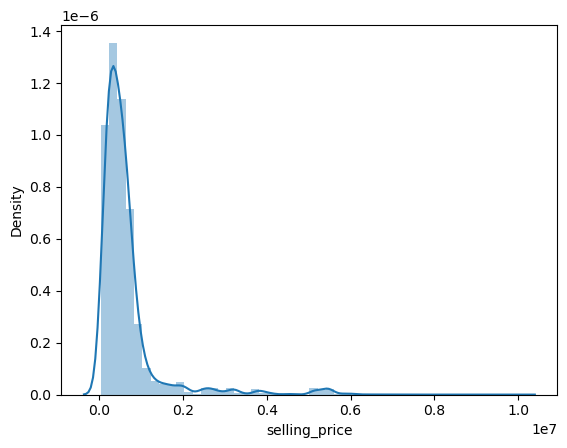

In [97]:
sns.distplot(df["selling_price"])

In [98]:
df["selling_price"].skew()

4.193533440675855

In [99]:
# Check for Multicolinearity

In [102]:
df[['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torq', 'Age']].corr()

,selling_price,km_driven,mileage,engine,max_power,torq,Age
selling_price,1.000000,-0.225534,-0.125040,0.458345,0.747935,-0.026574,-0.414092
km_driven,-0.225534,1.000000,-0.171746,0.198911,-0.040599,-0.225604,0.418006
mileage,-0.125040,-0.171746,1.000000,-0.574128,-0.372897,-0.173322,-0.311657
engine,0.458345,0.198911,-0.574128,1.000000,0.703612,-0.201131,-0.035851
max_power,0.747935,-0.040599,-0.372897,0.703612,1.000000,-0.001697,-0.224704
torq,-0.026574,-0.225604,-0.173322,-0.201131,-0.001697,1.000000,-0.099360
Age,-0.414092,0.418006,-0.311657,-0.035851,-0.224704,-0.099360,1.000000


<Axes: >

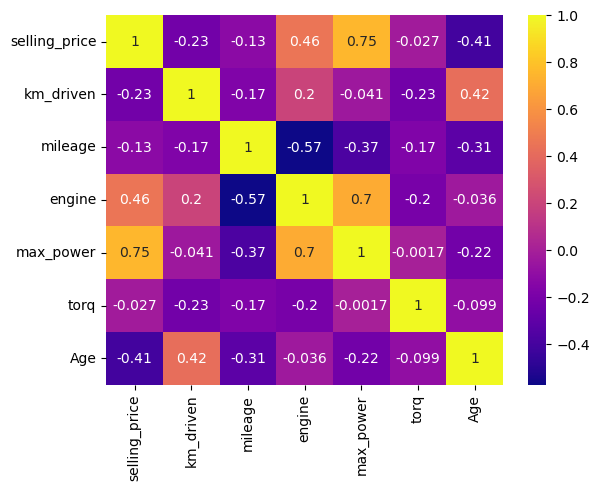

In [104]:
sns.heatmap(df[['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torq','Age']].corr(),annot=True,cmap="plasma")

In [105]:
# Split Data 
X=df.drop("selling_price",axis=1)

In [106]:
X

,km_driven,mileage,engine,max_power,torq,Age,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,...,Companyname_Mitsubishi,Companyname_Nissan,Companyname_Opel,Companyname_Peugeot,Companyname_Renault,Companyname_Skoda,Companyname_Tata,Companyname_Toyota,Companyname_Volkswagen,Companyname_Volvo
0,145500,23.40,1248.0,74.00,2000.0,8,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,120000,21.14,1498.0,103.52,2500.0,8,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,140000,17.70,1497.0,78.00,3000.0,16,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,127000,23.00,1396.0,90.00,2750.0,12,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,120000,16.10,1298.0,88.20,3000.0,15,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,110000,18.50,1197.0,82.85,4000.0,9,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
8124,119000,16.80,1493.0,110.00,3000.0,15,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8125,120000,19.30,1248.0,73.90,2000.0,13,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8126,25000,23.57,1396.0,70.00,3000.0,9,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [107]:
y=df["selling_price"]

In [108]:
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64

In [109]:
from sklearn.linear_model import LinearRegression

In [112]:
l=LinearRegression()

In [113]:
l.fit(X,y)

LinearRegression()

In [116]:
# R square 
l.score(X,y)

0.8551297833952862

In [115]:
l.intercept_

1501075.695020691

In [118]:
print(list(zip(X.columns,l.coef_)))

[('km_driven', -0.6123706148584259), ('mileage', -284.9796073354662), ('engine', 50.37211758870808), ('max_power', 6748.356477032488), ('torq', -40.067329517172766), ('Age', -44504.599900540925), ('fuel_CNG', -82163.5329189921), ('fuel_Diesel', -1380.723075743299), ('fuel_LPG', 107495.05474268924), ('fuel_Petrol', -23950.79874815239), ('seller_type_Dealer', 37341.31028641771), ('seller_type_Individual', -21425.746764889118), ('seller_type_Trustmark Dealer', -15915.563521579948), ('transmission_Automatic', 49101.751827932625), ('transmission_Manual', -49101.75182791536), ('owner_First Owner', -470015.6926479854), ('owner_Fourth & Above Owner', -491880.39831359824), ('owner_Second Owner', -526118.4707575734), ('owner_Test Drive Car', 1991199.2893603253), ('owner_Third Owner', -503184.7276410328), ('seats_2.0', -80631.978055308), ('seats_4.0', 293416.64379117795), ('seats_5.0', -42917.250130089975), ('seats_6.0', -133521.55316449367), ('seats_7.0', -949.873152834436), ('seats_8.0', -61756

In [119]:
pd.DataFrame(X.columns,l.coef_)

,0
-6.123706e-01,km_driven
-2.849796e+02,mileage
5.037212e+01,engine
6.748356e+03,max_power
-4.006733e+01,torq
...,...
-5.885445e+05,Companyname_Skoda
-6.693918e+05,Companyname_Tata
-2.605152e+05,Companyname_Toyota
-6.304782e+05,Companyname_Volkswagen


In [120]:
regp=l.predict(X)

In [121]:
regp

array([451768.11016409, 509920.43673197, -28921.87543839, ...,
       245354.14208264, 246777.48965815, 246777.48965815])

In [126]:
# Residual Actual selling pricce - predicted selling price
regresid=y-regp

In [125]:
regresid

0        -1768.110164
1      -139920.436732
2       186921.875438
3       -98460.752163
4       -63639.575336
            ...      
8123    -17738.222770
8124   -169584.477847
8125    136645.857917
8126     43222.510342
8127     43222.510342
Name: selling_price, Length: 8128, dtype: float64

In [128]:
#  Root Mean Square error (RMSE) - Diagnostic for all Regression Algorithm
np.sqrt(np.mean(regresid**2)) # RMSE -306855

306855.84355582553

<Axes: ylabel='Density'>

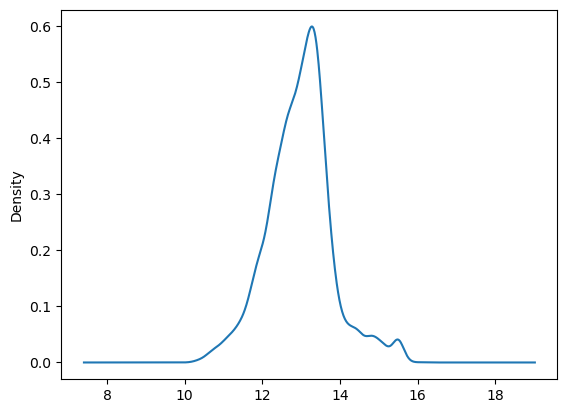

In [130]:
# here we take logarithmic values
np.log(y).plot(kind="density")

In [132]:
# log linear model
l2=LinearRegression().fit(X,np.log(y))

In [133]:
l2.score(X,np.log(y))

0.9096944948105495

In [134]:
rp=l2.predict(X)

In [135]:
rp=np.exp(rp)

In [142]:
regl2_resid=y-rp

In [143]:
np.sqrt(np.mean(regl2_resid**2))

207601.6712253081

In [144]:
# Decision Tree Regressor

In [145]:
from sklearn.tree import DecisionTreeRegressor

In [146]:
d=DecisionTreeRegressor()

In [147]:
d.fit(X,y)

DecisionTreeRegressor()

In [148]:
d.score(X,y)

0.9996093549810898

In [149]:
from sklearn.model_selection import cross_val_score

In [150]:
cross_val_score(d,X,y)

array([0.94905001, 0.94766241, 0.96672019, 0.9198988 , 0.89060003])

In [151]:
cross_val_score(d,X,y).mean()

0.9431752978386196

In [152]:
tp=d.predict(X)

In [153]:
tp

array([450000., 370000., 154000., ..., 382000., 290000., 290000.])

In [154]:
ts=y-tp

In [156]:
np.sqrt(np.mean(ts**2))

15934.410048085578

In [157]:
# Random Forest

In [158]:
from sklearn.ensemble import RandomForestRegressor

In [159]:
r=RandomForestRegressor(n_estimators=1000)

In [160]:
r.fit(X,y)

RandomForestRegressor(n_estimators=1000)

In [161]:
r.score(X,y)

0.995882672309532

In [162]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(r,X,y)

In [ ]:
cross_val_score(r,X,y).mean()